## Menyiapkan Seluruh Library yang Dibutuhkan

Library yang diimport dalam kode tersebut adalah:

1. `matplotlib.pyplot` (diperoleh dengan mengimport `pyplot` dari modul `matplotlib`): Library ini digunakan untuk membuat visualisasi grafik, plot, dan gambar.

2. `pandas` (diimport sebagai `pd`): Library ini digunakan untuk manipulasi dan analisis data, terutama dalam bentuk tabel atau dataframe.

3. `numpy` (diimport sebagai `np`): Library ini menyediakan fungsi dan alat untuk bekerja dengan array numerik, termasuk operasi matematika yang efisien.

4. `os.path`: Modul ini menyediakan fungsi-fungsi untuk berinteraksi dengan jalur sistem file. Digunakan dalam kode untuk berinteraksi dengan path file dan direktori.

5. `imutils`: Library ini menyediakan berbagai utilitas untuk mempermudah pengolahan gambar, seperti redimensioning, rotasi, dan penerapan filter.

6. `math`: Modul ini menyediakan fungsi-fungsi matematika dasar. Digunakan dalam kode untuk operasi matematika tertentu.

7. `cv2` (OpenCV): Library ini adalah Open Source Computer Vision Library. Digunakan untuk manipulasi gambar, pemrosesan citra, dan pengenalan pola.

8. `os`: Modul ini menyediakan fungsi-fungsi untuk berinteraksi dengan sistem operasi. Digunakan dalam kode untuk berinteraksi dengan sistem file dan direktori.

9. `re`: Modul ini menyediakan fungsi-fungsi untuk bekerja dengan ekspresi reguler. Digunakan dalam kode untuk pencocokan pola string.

Dengan mengimpor library-library ini, kita dapat memanfaatkan fungsi-fungsi dan alat-alat yang disediakan untuk tugas-tugas yang berkaitan dengan manipulasi dan analisis data, visualisasi grafik, pemrosesan gambar, dan operasi matematika.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os.path 
import imutils
import math
import cv2 
import os
import re

## Menampilkan Seluruh Gambar Pada Folder

Fungsi `insertImg` memiliki satu parameter yaitu `folder`, yang merupakan jalur direktori yang berisi gambar-gambar untuk dimasukkan.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `insertImg`:

1. Membuat list kosong `data` untuk menyimpan data gambar dalam format yang sesuai.

2. Membuat list kosong `filenames` untuk menyimpan nama file gambar yang dimasukkan.

3. Membuat list kosong `labels` untuk menyimpan label dari setiap gambar.

4. Melakukan iterasi melalui setiap `label` dalam direktori `folder` menggunakan `os.listdir(folder)`.

5. Di dalam setiap iterasi `label`, melakukan iterasi melalui setiap `filename` dalam direktori `folder+"/"+label` menggunakan `os.listdir(folder+"/"+label)`.

6. Di dalam setiap iterasi `filename`, menambahkan `label` ke list `labels` sebagai label gambar.

7. Membaca gambar menggunakan `cv2.imread(os.path.join(folder+"/"+label,filename))`. Mengonversi warna gambar ke format RGB menggunakan `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`.

8. Jika gambar berhasil dibaca (tidak bernilai `None`), menambahkan gambar yang sudah dikonversi ke list `data`.

9. Menambahkan `filename` ke list `filenames`.

10. Setelah selesai iterasi, mengembalikan `data`, `filenames`, dan `labels`.

Dalam konteks kode yang diberikan, hasil dari pemanggilan fungsi `insertImg(folder)` akan mengembalikan tiga nilai yaitu `data`, `filenames`, dan `labels`. `data` akan berisi gambar-gambar yang sudah dikonversi ke format RGB, `filenames` akan berisi nama-nama file gambar, dan `labels` akan berisi label-label yang sesuai dengan gambar-gambar tersebut.

In [2]:
def insertImg(folder):
    data = []
    filenames = []
    labels = []
    for label in os.listdir(folder):
        for filename in os.listdir(folder+"/"+label):
            labels.append(label)
            img = cv2.imread(os.path.join(folder+"/"+label,filename))
            filenames.append(filename)
            if img is not None:
                data.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return data, filenames, labels


In [3]:
images, filename, labels = insertImg("traffic_light_data/train/")

## Menampilkan Gambar Pada Folder

Fungsi `showImg` memiliki satu parameter yaitu `img`, yang merupakan daftar gambar yang akan ditampilkan.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `showImg`:

1. Mengatur ukuran gambar menggunakan `plt.figure(figsize=(20,20))` untuk membuat gambar yang lebih besar.

2. Melakukan iterasi melalui setiap `i` dalam rentang panjang dari `len(img)`.

3. Di dalam setiap iterasi, menggunakan `plt.subplot(1,len(img),i+1)` untuk membuat subplot dengan tata letak 1 baris dan `len(img)` kolom, dan memilih subplot ke `i+1` sebagai subplot aktif.

4. Menampilkan gambar menggunakan `plt.imshow(img[i], cmap='gray')`. Parameter `cmap='gray'` digunakan untuk menampilkan gambar dalam skala abu-abu (grayscale).

Dalam konteks kode yang diberikan, fungsi `showImg(img)` akan menampilkan gambar-gambar yang ada dalam `img` sebagai subplot dengan tata letak 1 baris dan `len(img)` kolom. Setiap gambar akan ditampilkan dalam skala abu-abu.

In [4]:
def showImg(img):
    plt.figure(figsize=(20,20))
    for i in range(len(img)):
        plt.subplot(1,len(img),i+1)
        plt.imshow(img[i], cmap='gray')

## Melakukan Segmentasi Warna

Berikut adalah penjelasan dari masing-masing fungsi yang terdapat dalam kode:

1. Fungsi `green(img)`: Fungsi ini melakukan segmentasi gambar berdasarkan interval warna hijau. Pertama, gambar diubah ke format HSV menggunakan `cv2.cvtColor(img, cv2.COLOR_BGR2HSV)`. Kemudian, diterapkan sebuah mask menggunakan `cv2.inRange()` dengan rentang warna hijau yaitu (40, 40, 40) hingga (70, 255, 255) pada komponen HSV. Hasil mask digunakan untuk membuat gambar hasil segmentasi dengan mengatur piksel pada `hasil` sesuai dengan mask. Piksel yang tidak memenuhi mask akan menjadi nol (hitam). Gambar hasil segmentasi kemudian dikembalikan.

2. Fungsi `red(img)`: Fungsi ini melakukan segmentasi gambar berdasarkan interval warna merah. Seperti pada fungsi `green(img)`, gambar diubah ke format HSV dan diterapkan mask dengan rentang warna merah yaitu (0, 100, 20) hingga (179, 255, 255) pada komponen HSV. Hasil segmentasi dikembalikan.

3. Fungsi `yellow(img)`: Fungsi ini melakukan segmentasi gambar berdasarkan interval warna kuning. Gambar diubah ke format HSV dan diterapkan mask dengan rentang warna kuning yaitu (23, 93, 0) hingga (40, 255, 255) pada komponen HSV. Hasil segmentasi dikembalikan.

4. Fungsi `segment(image)`: Fungsi ini melakukan segmentasi gambar berdasarkan tiga warna: hijau, merah, dan kuning. Fungsi ini memanggil fungsi `green(image)`, `red(image)`, dan `yellow(image)` untuk mendapatkan hasil segmentasi untuk masing-masing warna tersebut. Kemudian, ketiga hasil segmentasi digabungkan dengan menjumlahkan piksel-piksel yang memiliki nilai lebih dari nol (warna tersegmentasi). Hasil segmentasi yang telah digabungkan dikembalikan.

5. Fungsi `rgb(image)`: Fungsi ini menghitung beberapa statistik sederhana dari gambar dalam format RGB. Pertama, gambar diubah orientasinya menggunakan `image.transpose()` agar setiap komponen warna (R, G, B) berada pada baris yang terpisah. Kemudian, dihitung rata-rata (`rmean`, `gmean`, `bmean`) dan nilai maksimum (`rmax`, `gmax`, `bmax`) dari setiap komponen warna. Nilai-nilai ini dikembalikan dalam bentuk daftar.

Fungsi-fungsi ini dapat digunakan untuk melakukan segmentasi warna pada gambar dan mendapatkan statistik sederhana dari gambar dalam format RGB.

In [5]:
def green(img): # segmentasi interval Hijau
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, (40, 40, 40), (70, 255,255))
    imask = mask>0
    hasil = np.zeros_like(img, np.uint8)
    hasil[imask] = img[imask]

    return hasil

def red(img): # segmentasi interval Merah
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, (0, 100, 20), (179, 255,255))
    imask = mask>0
    hasil = np.zeros_like(img, np.uint8)
    hasil[imask] = img[imask]

    return hasil

def yellow(img): # segmentasi interval Kuning
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, (23,93,0), (40,255,255))
    imask = mask>0
    hasil = np.zeros_like(img, np.uint8)
    hasil[imask] = img[imask]

    return hasil

def segment(image): # segmentasi 3 Based Warna
    return green(image)+red(image)+yellow(image)

def rgb(image):
    image = image.transpose()
    rs = image[0]
    gs = image[1]
    bs = image[2]

    rmean = np.mean(rs)
    gmean = np.mean(gs)
    bmean = np.mean(bs)

    rmax= np.amax(rs)
    gmax= np.amax(gs)
    bmax= np.amax(bs)

    return [rmean, gmean, bmean, rmax, gmax, bmax]

## Merubah Ukuran Gambar

Kode di atas melakukan resizing (perubahan ukuran) dari setiap gambar dalam daftar `images`. Setiap gambar diubah ukurannya menjadi 300 piksel lebar dan 500 piksel tinggi menggunakan `cv2.resize()`. Hasil resizing kemudian ditambahkan ke dalam daftar `resizes`. 

Dalam proses resizing, digunakan metode interpolasi `cv2.INTER_CUBIC`, yang merupakan salah satu metode interpolasi yang digunakan untuk merubah ukuran gambar. Metode ini memperhitungkan piksel tetangga secara lebih jauh dan menghasilkan gambar yang lebih halus namun memerlukan komputasi yang lebih intensif.

Setelah proses looping selesai, daftar `resizes` akan berisi gambar-gambar yang telah diubah ukurannya.

In [6]:
resizes = []
for image in images:
    result = cv2.resize(image, (300, 500), interpolation=cv2.INTER_CUBIC)
    resizes.append(result)


## Melakukan Normalisasi Pada Gambar

Kode di atas melakukan normalisasi intensitas piksel pada setiap gambar dalam daftar `resizes`. Normalisasi intensitas piksel dilakukan menggunakan fungsi `cv2.normalize()`. 

Pada setiap iterasi, gambar diambil dari daftar `resizes` dan diaplikasikan normalisasi intensitas pikselnya. Dalam fungsi `cv2.normalize()`, `image` merupakan gambar yang akan dinormalisasi, `None` menandakan bahwa tidak ada maska yang digunakan, `alpha` dan `beta` menentukan rentang intensitas piksel hasil normalisasi, dan `norm_type` menentukan jenis normalisasi yang akan dilakukan (dalam hal ini `cv2.NORM_MINMAX`).

Hasil normalisasi intensitas piksel dari setiap gambar kemudian ditambahkan ke dalam daftar `normalize`. Setelah looping selesai, daftar `normalize` akan berisi gambar-gambar yang telah dinormalisasi intensitas pikselnya sesuai dengan rentang yang ditentukan.

In [7]:
normalize = []
for image in resizes:
    image = cv2.normalize(image, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX) 
    normalize.append(image)

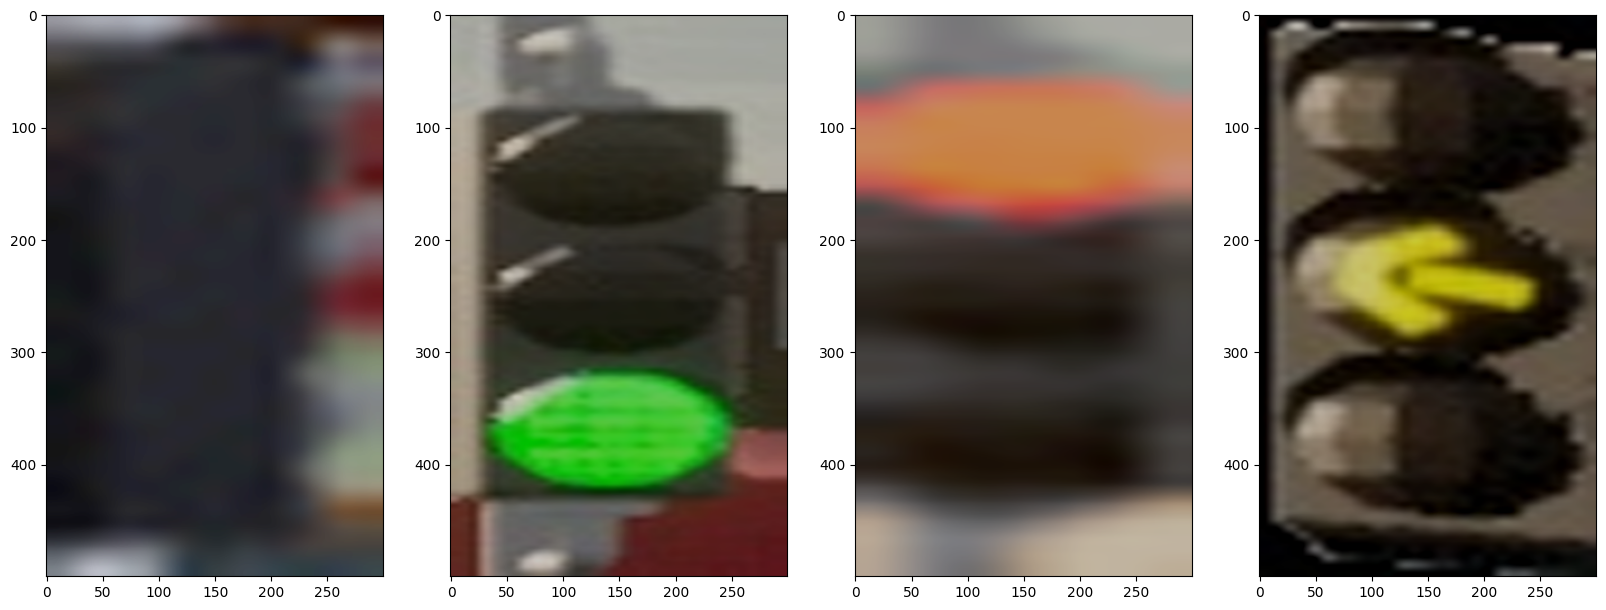

In [8]:
showImg([normalize[0],normalize[600],normalize[1200],normalize[2001]])

Fungsi `median_filter()` di atas merupakan implementasi filter median pada gambar. Fungsi ini menerima gambar `image` sebagai input dan mengembalikan gambar hasil filter median.

Pada fungsi ini, filter median diterapkan menggunakan fungsi `cv2.medianBlur()`. Parameter pertama adalah gambar `image` yang akan difilter. Parameter kedua, yaitu `7`, menentukan ukuran kernel filter median, yang mengindikasikan bahwa piksel tetangga sejauh 7 piksel dari piksel yang sedang diproses akan digunakan dalam perhitungan median. Anda dapat menyesuaikan nilai ini sesuai kebutuhan.

Setelah proses filter median selesai, gambar hasil filter median akan dikembalikan oleh fungsi `median_filter()` dan digunakan dalam langkah-langkah berikutnya dalam analisis gambar.

In [9]:
def median_filter(image):
    filtered_image = cv2.medianBlur(image, 7)
    return filtered_image

Kode di atas menggunakan filter median untuk mengurangi derau pada setiap gambar dalam daftar `normalize`. Filter median digunakan untuk menghilangkan derau atau piksel yang memiliki nilai ekstrem yang tidak sesuai dengan piksel sekitarnya.

Pada setiap iterasi, gambar diambil dari daftar `normalize` dan diterapkan filter median menggunakan fungsi `median_filter()`. Hasil filter median kemudian ditampung ke dalam variabel `median` yang kemudian ditambahkan ke dalam daftar `medians`.

Setelah proses looping selesai, daftar `medians` akan berisi gambar-gambar yang telah melewati filter median, sehingga membantu dalam mengurangi derau dan menghasilkan gambar yang lebih bersih dan lebih tajam.

In [10]:
medians = []
for median in normalize:
    median = median_filter(median)
    medians.append(median)

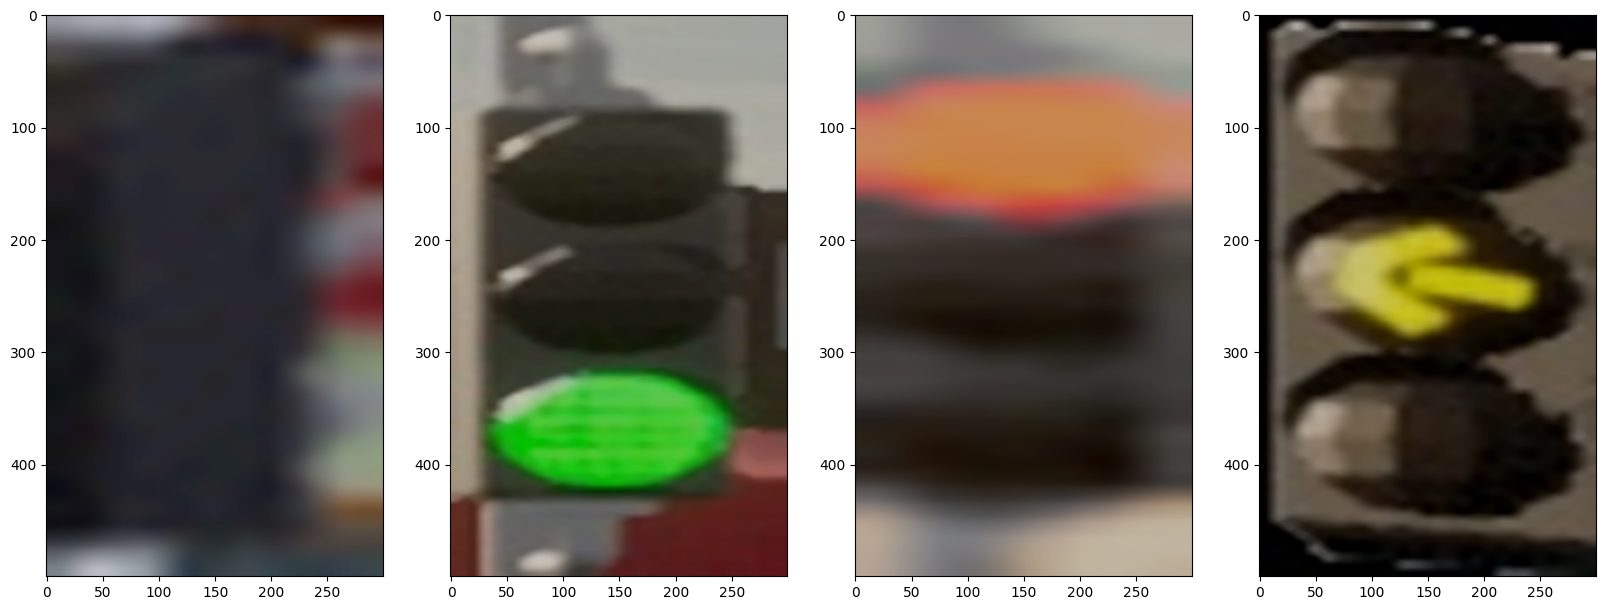

In [11]:
showImg([medians[0],medians[600],medians[1200],medians[2001]])

Kode di atas menghasilkan segmentasi warna pada setiap gambar dalam daftar `medians`. Setiap gambar dalam `medians` diambil dan diteruskan ke fungsi `segment()` untuk melakukan segmentasi warna.

Pada setiap iterasi, gambar diambil dari daftar `medians` dan diproses melalui fungsi `segment()`. Fungsi `segment()` akan menghasilkan gambar yang telah dilakukan segmentasi warna dengan mempertahankan area yang berwarna hijau, merah, dan kuning.

Hasil segmentasi warna kemudian ditambahkan ke dalam daftar `segments`. Setelah looping selesai, daftar `segments` akan berisi gambar-gambar hasil segmentasi warna yang siap untuk digunakan dalam langkah-langkah berikutnya dalam analisis gambar.

In [12]:
segments = []
for img in medians:
    segments.append(segment(img))

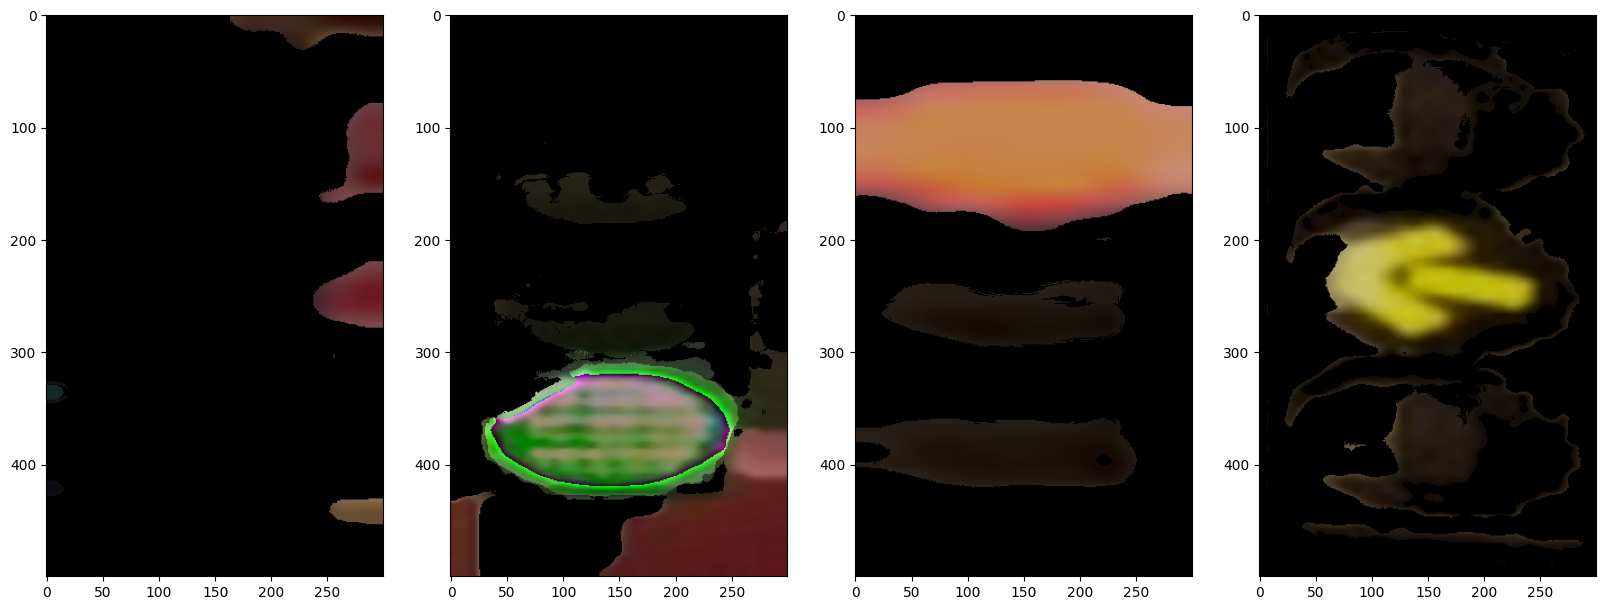

In [13]:
showImg([segments[0],segments[600],segments[1200],segments[2001]])

Fungsi `eros()` di atas melakukan operasi edge detection pada gambar yang diberikan. Fungsi ini menerima gambar `image` sebagai input dan mengembalikan gambar hasil deteksi tepi.

Pertama, gambar `image` dikonversi menjadi citra skala abu-abu menggunakan fungsi `cv2.cvtColor()` dengan mode konversi `cv2.COLOR_BGR2GRAY`. Hal ini diperlukan karena deteksi tepi umumnya dilakukan pada gambar dengan citra skala abu-abu.

Selanjutnya, menggunakan operator Sobel, tepi horizontal dan vertikal dihitung dari citra skala abu-abu menggunakan fungsi `cv2.Sobel()`. Parameter `ksize` menentukan ukuran kernel Sobel yang digunakan.

Kemudian, tepi horizontal dan vertikal dijumlahkan menggunakan fungsi `np.sqrt()` untuk menghitung magnitude atau kekuatan total dari tepi pada kedua arah. Hasil akhirnya disimpan dalam variabel `result` dan dikembalikan oleh fungsi `eros()`.

Fungsi ini dapat membantu dalam mengidentifikasi dan menyoroti tepi objek dalam gambar yang dapat digunakan dalam berbagai analisis gambar atau pengolahan lebih lanjut.

In [14]:
def eros(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    result = np.sqrt(gradient_x**2 + gradient_y**2)
    
    return result

Kode di atas melakukan proses erosi pada setiap gambar dalam daftar `segments`. Setiap gambar dalam `segments` diambil dan diteruskan ke fungsi `eros()` untuk melakukan deteksi tepi.

Pada setiap iterasi, gambar diambil dari daftar `segments` dan diproses melalui fungsi `eros()`. Fungsi `eros()` akan menghasilkan gambar yang telah dilakukan deteksi tepi dengan menggunakan operator Sobel.

Hasil deteksi tepi kemudian ditambahkan ke dalam daftar `eroded`. Setelah looping selesai, daftar `eroded` akan berisi gambar-gambar hasil deteksi tepi yang siap untuk digunakan dalam langkah-langkah berikutnya dalam analisis gambar.

In [15]:
eroded = []
for erosi in segments:
    erosi = eros(erosi)
    eroded.append(erosi)

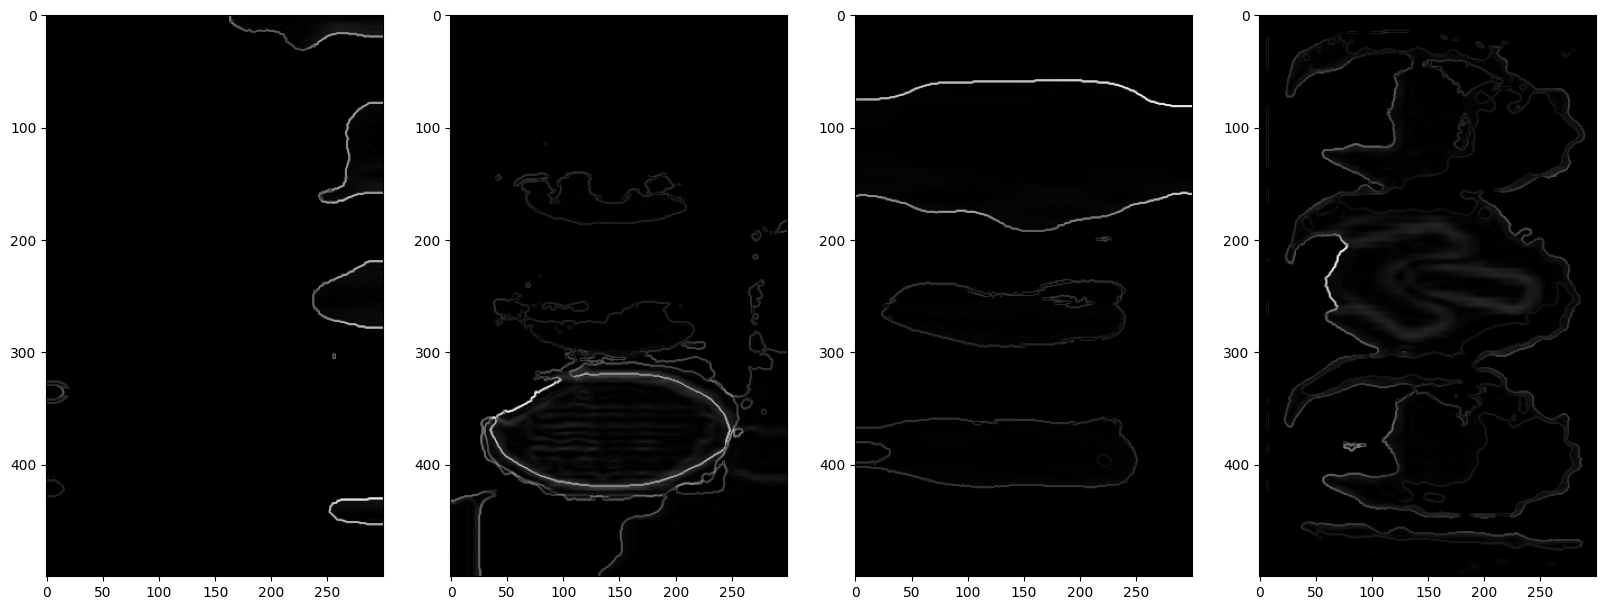

In [16]:
showImg([eroded[0],eroded[600],eroded[1200],eroded[2001]])

Kode di atas menghasilkan citra hasil masking pada setiap citra dalam daftar `normalize` dengan menggunakan citra mask dari daftar `eroded`. 

Pada setiap iterasi, citra dalam daftar `normalize` diambil dan disimpan dalam variabel `img`. Citra mask dari daftar `eroded` diambil dan diubah tipe datanya menjadi `np.uint8` dengan `mask.astype(np.uint8)`.

Selanjutnya, fungsi `cv2.bitwise_and()` digunakan untuk melakukan operasi bitwise AND antara citra `img` dan `mask`. Operasi ini menghasilkan citra baru yang merupakan hasil dari masking, di mana hanya bagian-bagian citra yang sesuai dengan mask yang memiliki nilai piksel yang bukan nol yang akan dipertahankan, sedangkan bagian-bagian yang tidak sesuai dengan mask akan menjadi hitam.

Citra hasil masking kemudian ditambahkan ke dalam daftar `masked`. Setelah looping selesai, daftar `masked` akan berisi citra-citra hasil masking yang siap untuk digunakan dalam langkah-langkah berikutnya dalam analisis gambar.

In [17]:
masked = []
for index, mask in enumerate(eroded):
    img = normalize[index]

    mask = mask.astype(np.uint8)

    masked_img = cv2.bitwise_and(img, img, mask=mask)
    masked.append(masked_img)

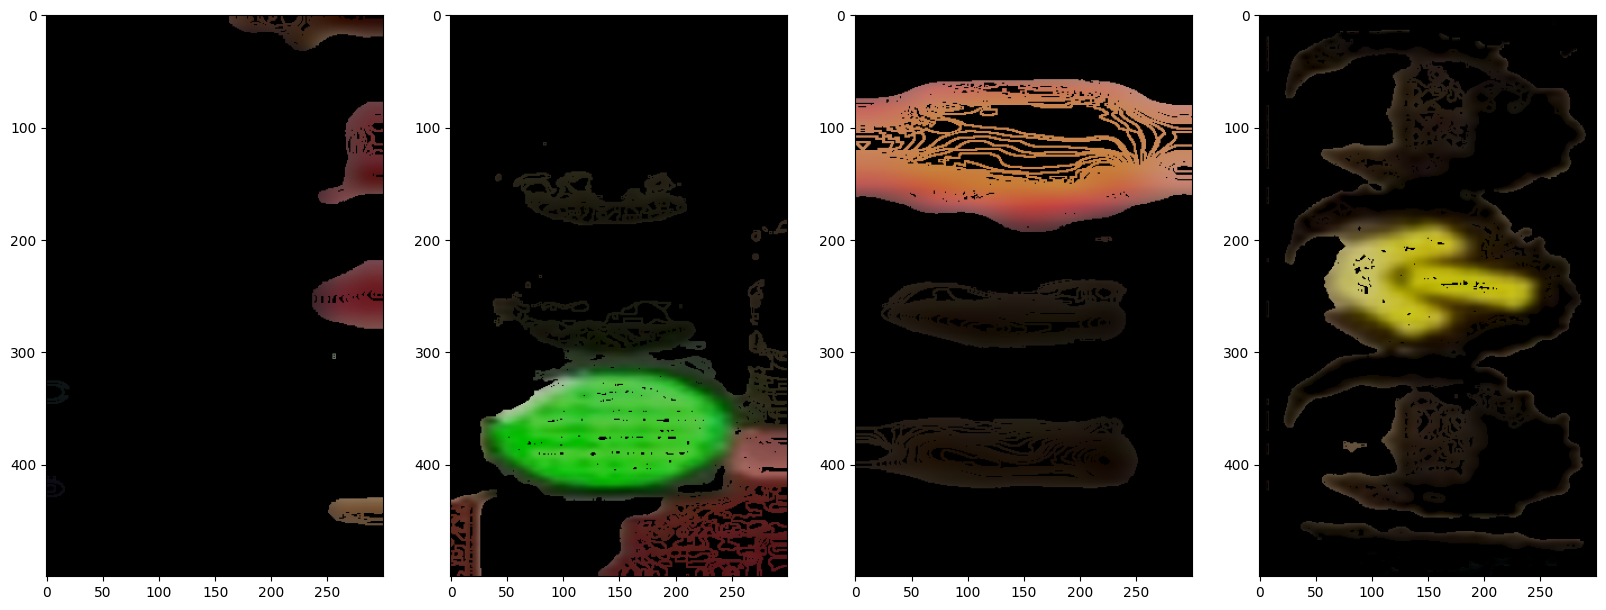

In [18]:
showImg([masked[0],masked[600],masked[1200],masked[2001]])

Kode di atas menghasilkan fitur-fitur yang mewakili setiap citra dalam daftar `segments`. Setiap citra dalam daftar diambil dan diproses melalui fungsi `rgb()` untuk menghitung fitur RGB yang terdiri dari rata-rata nilai R, G, B, serta nilai maksimum R, G, B dari citra tersebut.

Pada setiap iterasi, citra diambil dari daftar `segments` dan diteruskan ke fungsi `rgb()`. Fungsi `rgb()` akan menghitung fitur-fitur RGB dengan mengubah format citra menjadi citra transpose dan kemudian menghitung rata-rata dan nilai maksimum dari setiap saluran R, G, B.

Setiap fitur yang dihasilkan kemudian ditambahkan ke dalam daftar `features`. Setelah looping selesai, daftar `features` akan berisi fitur-fitur yang mewakili setiap citra dalam `segments` dan siap untuk digunakan dalam proses pengenalan warna.

In [19]:
features = []
for image in segments:
    feature = rgb(image)
    features.append(feature)

In [20]:
filenames = pd.DataFrame(filename, columns=["filenames"])
labelsdf = pd.DataFrame(labels, columns=["labels"])

In [21]:
def export(data, namafile, column):
    glcm_df = pd.DataFrame(data, columns = column)
    glcm_df.to_csv(namafile)

In [22]:
fitur = pd.DataFrame(features, columns=["hmean", "smean", "vmean", "hmax", "smax", "vmax"])
fitur.head()
columns=["hmean", "smean", "vmean", "hmax", "smax", "vmax"]
export(fitur, 'fitur.csv', columns)

In [23]:
def exportCiri(filenames, fitur, label):
    glcm_df = pd.concat([filenames, fitur, label], axis=1)
    glcm_df.to_csv('ciri.csv')

In [24]:
ciri = pd.concat([filenames, fitur, labelsdf], axis=1)
ciri.head()
exportCiri(filenames, fitur, labelsdf)

Kode di atas mengimpor beberapa library yang digunakan untuk evaluasi dan pemodelan data:

- `simplefilter` dari `warnings` digunakan untuk mengabaikan pesan peringatan masa depan (`FutureWarning`).
- `confusion_matrix` dari `sklearn.metrics` digunakan untuk menghitung matriks kebingungan (confusion matrix) yang merupakan metrik evaluasi untuk masalah klasifikasi.
- `train_test_split` dari `sklearn.model_selection` digunakan untuk membagi data menjadi data latih dan data uji.
- `classification_report` dari `sklearn.metrics` digunakan untuk menghasilkan laporan klasifikasi yang berisi metrik evaluasi seperti akurasi, presisi, recall, dan f1-score.
- `plt` dari `matplotlib.pyplot` digunakan untuk membuat visualisasi seperti grafik dan plot.

Dengan mengimpor library-library ini, kita dapat menggunakan fungsi-fungsi dan metode-metode yang ada di dalamnya untuk melakukan evaluasi, pemodelan, dan visualisasi terkait data.

In [25]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [26]:
x = fitur.values
y = labelsdf.values.ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=21)

Kode di atas melakukan pemodelan menggunakan algoritma klasifikasi K-Nearest Neighbors (KNN) dengan menggunakan `KNeighborsClassifier` dari `sklearn.neighbors`.

Langkah-langkah yang dilakukan adalah sebagai berikut:

1. Membuat objek model KNN dengan `KNeighborsClassifier(n_neighbors=5)`, yang akan menggunakan 5 tetangga terdekat untuk mengklasifikasikan sampel.
2. Melatih model KNN dengan memanggil metode `fit()` pada objek model menggunakan data latih `x_train` dan label latih `y_train`.
3. Memprediksi label untuk data uji dengan memanggil metode `predict()` pada objek model menggunakan data uji `x_test`.
4. Mencetak laporan klasifikasi menggunakan `classification_report(y_test, y_pred)`, yang memberikan informasi tentang metrik evaluasi seperti akurasi, presisi, recall, dan f1-score berdasarkan perbandingan antara label sebenarnya `y_test` dengan label prediksi `y_pred`.
5. Mencetak akurasi menggunakan `accuracy_score(y_test, y_pred)`, yang menghitung akurasi dari prediksi model dengan membandingkannya dengan label sebenarnya.

Dengan mencetak laporan klasifikasi dan akurasi, kita dapat mengevaluasi kinerja model KNN dalam melakukan prediksi klasifikasi.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelnb = KNeighborsClassifier(n_neighbors=5)

nbtrain = modelnb.fit(x_train, y_train)
y_pred = nbtrain.predict(x_test)
print(classification_report(y_test, y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        back       1.00      0.96      0.98       101
       green       0.97      1.00      0.99       111
         red       0.99      0.98      0.99       106
      yellow       0.98      1.00      0.99       111

    accuracy                           0.99       429
   macro avg       0.99      0.99      0.99       429
weighted avg       0.99      0.99      0.99       429

Accuracy:  0.986013986013986
